<a href="https://colab.research.google.com/github/umutcanc7/DSA210-PROJECT-/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance:
Mean Absolute Error (MAE): 1818.32
R-squared (R2): 0.01


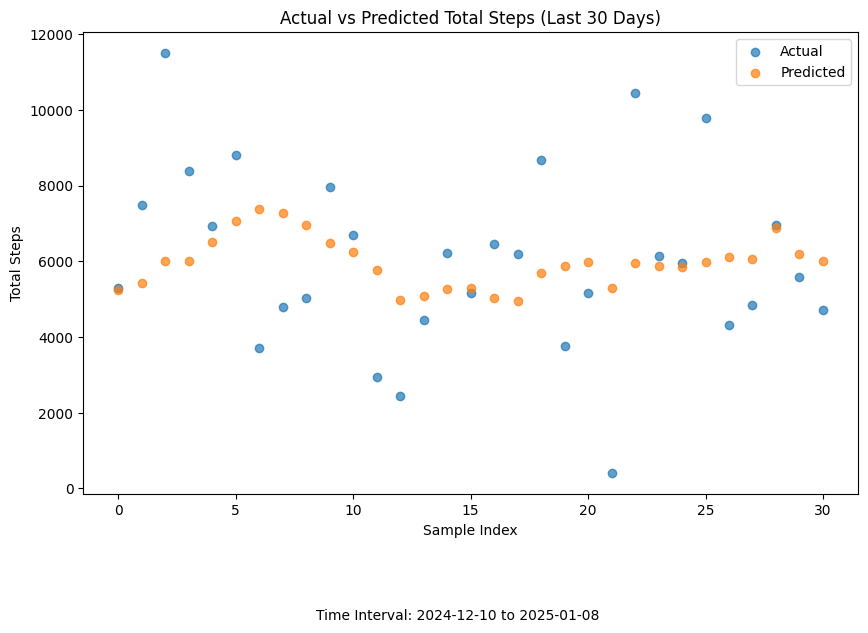

Predicted Total Steps: 5316.51


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

match_data_path = "match_data.csv"
step_count_path = "step_count.csv"

match_data = pd.read_csv(match_data_path)
step_count = pd.read_csv(step_count_path)

match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')
step_count['Date'] = pd.to_datetime(step_count['Date'], format='%Y-%m-%d')

merged_data = pd.merge(step_count, match_data, on='Date', how='left')

merged_data['Time'] = merged_data['Time'].fillna('None')
merged_data['Score'] = merged_data['Score'].fillna('None')
merged_data['Result'] = merged_data['Result'].fillna('None')

merged_data['Total Steps'] = pd.to_numeric(merged_data['Total Steps'], errors='coerce')

merged_data['steps_avg_7'] = merged_data['Total Steps'].rolling(window=7).mean()
merged_data['steps_avg_14'] = merged_data['Total Steps'].rolling(window=14).mean()
merged_data['steps_avg_30'] = merged_data['Total Steps'].rolling(window=30).mean()

merged_data_cleaned = merged_data.dropna()

features = merged_data_cleaned[['steps_avg_7', 'steps_avg_14', 'steps_avg_30']]
target = merged_data_cleaned['Total Steps']

train_end_date = merged_data_cleaned['Date'].iloc[-31]  # Last 30 days for testing
X_train = features[merged_data_cleaned['Date'] < train_end_date]
X_test = features[merged_data_cleaned['Date'] >= train_end_date]
y_train = target[merged_data_cleaned['Date'] < train_end_date]
y_test = target[merged_data_cleaned['Date'] >= train_end_date]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

def predict_steps(steps_avg_7, steps_avg_14, steps_avg_30):
    input_features = [[steps_avg_7, steps_avg_14, steps_avg_30]]
    return model.predict(input_features)[0]

def visualize_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7)
    plt.title("Actual vs Predicted Total Steps (Last 30 Days)")
    plt.xlabel("Sample Index")
    plt.ylabel("Total Steps")
    start_date = merged_data_cleaned['Date'].iloc[-30]
    end_date = merged_data_cleaned['Date'].iloc[-1]
    plt.figtext(0.5, -0.1, f"Time Interval: {start_date.date()} to {end_date.date()}", wrap=True, horizontalalignment='center', fontsize=10)
    plt.legend()
    plt.show()

visualize_predictions(y_test.values, y_pred)

example_prediction = predict_steps(steps_avg_7=5000, steps_avg_14=5200, steps_avg_30=5300)
print(f"Predicted Total Steps: {example_prediction:.2f}")


It merges the datasets based on the Date column and calculates 7-day, 14-day, and 30-day moving averages of daily step counts. Using these averages as features, the script trains a linear regression model to predict total daily steps. The training data excludes the last 30 days, which are reserved for testing the model. The script evaluates the model's performance using Mean Absolute Error (MAE) and R-squared metrics and visualizes the actual versus predicted step counts for the last 30 days.

##RESULTS
The **Mean Absolute Error (MAE)** of 1818.32 shows that the model's step count predictions deviate from actual values by an average of 1818 steps, which may be high if typical step counts vary within a narrow range. The **R-squared (R²)** of 0.01 indicates the model explains only 1% of the variance in the data, suggesting poor performance and limited predictive capability. The model likely needs more relevant features or a better structure to improve accuracy.